In [1]:
# function for return dom response after parsting oai-pmh URL
def oaipmh_response(URL):
    file = urllib.request.urlopen(URL)
    data = file.read()
    file.close()
 
    dom = xml.dom.minidom.parseString(data) #dom has to be imported somehow
    return dom

In [22]:
 # function for getting value of resumptionToken after parsting oai-pmh URL
def oaipmh_resumptionToken(URL):
    file = urllib.request.urlopen(URL)
    data = file.read()
    file.close()
 
    dom = xml.dom.minidom.parseString(data)
   # print ("START: "+str(datetime.datetime.now()))
    return dom.getElementsByTagName('resumptionToken')[0].firstChild.nodeValue

In [23]:
# function for writing to output files
def write_xml_file(inputData, outputFile):
    oaipmhResponse = open(outputFile, mode="w", encoding = 'utf-8')
    oaipmhResponse.write(inputData)
    oaipmhResponse.close()
   # print ("END: "+str(datetime.datetime.now()))

In [ ]:
# main code
import urllib.request
import urllib.parse
import xml.dom.minidom
baseURL = 'http://www.netd.ac.za/OAI-PMH/'
getRecordsURL = str(baseURL+'?verb=ListRecords&metadataPrefix=oai_dc')
 
# initial parse phase
resumptionToken = oaipmh_resumptionToken(getRecordsURL) # get initial resumptionToken
print ("Resumption Token: "+resumptionToken)
outputFile = 'page-0.xml' # define initial file to use for writing response
write_xml_file(oaipmh_response(getRecordsURL).toxml(), outputFile)
 
# loop parse phase
pageCounter = 1
while resumptionToken != "":
    print ("URL ECONDED TOKEN: "+resumptionToken)
    resumptionToken = urllib.parse.urlencode({'resumptionToken':resumptionToken}) # create resumptionToken URL parameter
    print ("Resumption Token: "+resumptionToken)
    getRecordsURLLoop = str(baseURL+'?verb=ListRecords&'+resumptionToken)
    oaipmhXML = oaipmh_response(getRecordsURLLoop).toxml()
    outputFile = 'page-'+str(pageCounter) # create file name to use for writing response
    write_xml_file(oaipmhXML, outputFile) # write response to output file
 
    resumptionToken = oaipmh_resumptionToken(getRecordsURLLoop)
    pageCounter += 1 # increament page counter

Resumption Token: 2014-02-04T16:15:33Z!2037-01-01T00:00:00Z!!oai_dc!1000!171868!oai:union.ndltd.org:ufs/oai:etd.uovs.ac.za:etd-07172013-155725
URL ECONDED TOKEN: 2014-02-04T16:15:33Z!2037-01-01T00:00:00Z!!oai_dc!1000!171868!oai:union.ndltd.org:ufs/oai:etd.uovs.ac.za:etd-07172013-155725
Resumption Token: resumptionToken=2014-02-04T16%3A15%3A33Z%212037-01-01T00%3A00%3A00Z%21%21oai_dc%211000%21171868%21oai%3Aunion.ndltd.org%3Aufs%2Foai%3Aetd.uovs.ac.za%3Aetd-07172013-155725
URL ECONDED TOKEN: 2014-02-04T17:01:29Z!2037-01-01T00:00:00Z!!oai_dc!2000!171868!oai:union.ndltd.org:uwc/oai:UWC_ETD:http%3A%2F%2Fetd.uwc.ac.za%2Findex.php%3Fmodule%3Detd%26action%3Dviewtitle%26id%3Dinit_9308_1173966614
Resumption Token: resumptionToken=2014-02-04T17%3A01%3A29Z%212037-01-01T00%3A00%3A00Z%21%21oai_dc%212000%21171868%21oai%3Aunion.ndltd.org%3Auwc%2Foai%3AUWC_ETD%3Ahttp%253A%252F%252Fetd.uwc.ac.za%252Findex.php%253Fmodule%253Detd%2526action%253Dviewtitle%2526id%253Dinit_9308_1173966614
URL ECONDED TOKEN: 

URL ECONDED TOKEN: 2015-04-07T14:49:55Z!2037-01-01T00:00:00Z!!oai_dc!24000!171868!oai:union.ndltd.org:up/oai:UP:etd-04112007-111900
Resumption Token: resumptionToken=2015-04-07T14%3A49%3A55Z%212037-01-01T00%3A00%3A00Z%21%21oai_dc%2124000%21171868%21oai%3Aunion.ndltd.org%3Aup%2Foai%3AUP%3Aetd-04112007-111900
URL ECONDED TOKEN: 2015-04-07T14:49:55Z!2037-01-01T00:00:00Z!!oai_dc!25000!171868!oai:union.ndltd.org:up/oai:UP:etd-05242009-122628
Resumption Token: resumptionToken=2015-04-07T14%3A49%3A55Z%212037-01-01T00%3A00%3A00Z%21%21oai_dc%2125000%21171868%21oai%3Aunion.ndltd.org%3Aup%2Foai%3AUP%3Aetd-05242009-122628
URL ECONDED TOKEN: 2015-04-07T14:49:55Z!2037-01-01T00:00:00Z!!oai_dc!26000!171868!oai:union.ndltd.org:up/oai:UP:etd-06292005-103006
Resumption Token: resumptionToken=2015-04-07T14%3A49%3A55Z%212037-01-01T00%3A00%3A00Z%21%21oai_dc%2126000%21171868%21oai%3Aunion.ndltd.org%3Aup%2Foai%3AUP%3Aetd-06292005-103006


### Feature Extraction

In [119]:
from xml.dom.minidom import parse
from xml.dom import minidom

count = 60
var_un = []
var_pub = []
var_title =[]
while count <= 147:    
    DOMtree = minidom.parse('etd\page-'+ str(count))
#     collection =  DOMtree.documentElement
    RecordList = DOMtree.getElementsByTagName("ListRecords")[0]
    records = RecordList.getElementsByTagName("record")
#     infor = records.getElementsByTagName("header")
    
    for universities in records:
        setSpecElement = universities.getElementsByTagName("setSpec")[0]
#         var_university = setSpecElement.firstChild.data

# creating a list of universities
        var_un.append(setSpecElement.firstChild.data)
        
        try:
            datestampElement = universities.getElementsByTagName("dc:title")[0]
            var_etdt = datestampElement.firstChild.data
            var_title.append(var_etdt)
        except Exception:
            var_etdt = "No title"
            var_title.append(var_etdt)

#         var_un.append(setSpecElement.firstChild.data)
#         print(var_university , ": ", var_year)
    print("page", count)
    count += 1
# print(len(var_un))






page 60
page 61
page 62
page 63
page 64
page 65
page 66
page 67
page 68
page 69
page 70
page 71
page 72
page 73
page 74
page 75
page 76
page 77
page 78
page 79
page 80
page 81
page 82
page 83
page 84
page 85
page 86
page 87
page 88
page 89
page 90
page 91
page 92
page 93
page 94
page 95
page 96
page 97
page 98
page 99
page 100
page 101
page 102
page 103
page 104
page 105
page 106
page 107
page 108
page 109
page 110
page 111
page 112
page 113
page 114
page 115
page 116
page 117
page 118
page 119
page 120
page 121
page 122
page 123
page 124
page 125
page 126
page 127
page 128
page 129
page 130
page 131
page 132
page 133
page 134
page 135
page 136
page 137
page 138
page 139
page 140
page 141
page 142
page 143
page 144
page 145
page 146
page 147


In [15]:
print(var_un)

['unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 'unisa', 

In [120]:
var_title

['An investigation into learner violence in township secondary schools: A socio-educational perspective',
 'The image of women in selected Tsonga novels',
 'School management training in Zimbabwe:\n\nneeds and opportunities',
 'The impact of the attitudes of school managers on the implementation of outcomes-based education (obe) in secondary schools',
 'The effects of an intensive reading programme on the academic performance of post-matric English Second Language students in Science',
 'Parusiepredigten aus dem Bereich der evangelischen Landeskirchen der DDR: eine homiletische Untersuchung zu Mt 24 mit qualitativen Fallbeispielen = Sermon on the parousia of Christ in the Evangelic Church of the GDR: a homiletical inquiry into Mt.24 with qualitative case studies',
 'An investigation into the historical, hermeneutical and Gospel-critical parameters for the interpretation of the symbol of resurrection',
 "'n Vergelyking van die kwantitatiewe en kwalitatiewe inligting oor werknemers in fi

# DATA CLEANING

In [224]:
##Import all libraries and modules for data cleaning and analysis
import pandas as pd
import re
import string

from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt 


# Case Folding

In [225]:
var_title = [var_titl.lower() for var_titl in var_title] 

In [123]:
var_title

['an investigation into learner violence in township secondary schools: a socio-educational perspective',
 'the image of women in selected tsonga novels',
 'school management training in zimbabwe:\n\nneeds and opportunities',
 'the impact of the attitudes of school managers on the implementation of outcomes-based education (obe) in secondary schools',
 'the effects of an intensive reading programme on the academic performance of post-matric english second language students in science',
 'parusiepredigten aus dem bereich der evangelischen landeskirchen der ddr: eine homiletische untersuchung zu mt 24 mit qualitativen fallbeispielen = sermon on the parousia of christ in the evangelic church of the gdr: a homiletical inquiry into mt.24 with qualitative case studies',
 'an investigation into the historical, hermeneutical and gospel-critical parameters for the interpretation of the symbol of resurrection',
 "'n vergelyking van die kwantitatiewe en kwalitatiewe inligting oor werknemers in fi

# Remving Stop Words

In [235]:
# import stopwokds from nltk library 
from nltk.corpus import stopwords 
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [236]:
var_title_stop = [ " ".join([x for x in var_titl.split() if x not in stopwords.words('english')]) 
                  for var_titl in var_title_punct]
var_title_stop

['thermal photostability studies triprolidine hydrochloride mixtures cyclodextrin glucose',
 'architecture means labour : architecture contributing contextual events consumption clothing production facility city pretoria',
 'effectiveness employee assistance programme (eap) substance abuse limpopo department public works sekhukhune district',
 'conflict anc ifp supporters impact development kwazulu-natal',
 'multifaceted retrospective analysis association zolpidem administration increased brain perfusion function neurologically compromised patients',
 'examination inadequacy wording damage claim provisions oil pollution act 1990, resulting interpretative legal difficulties revealed claims stemming deepwater horizon oil spill',
 'groundwater recharge estimation table mountain group aquifer systems case study kammanassie area',
 'effect temperature, time gas flow rate growth characterization cu(in,ga)se₂ (cigs) absorbers thin film solar cells',
 'study phytoplankton south western indian 

# Remove Punctuations

In [227]:
# Remove Punctuations
import re 
import string

# var_title
len(var_title)
var_title_punct = [var_titl_trim.strip() for var_titl_trim in var_title] 
var_title_punct = list(set(var_title_punct))
#len(var_title)



88000

# Stemming

In [237]:
from nltk.stem.porter import PorterStemmer
var_stemmer = PorterStemmer()

def fxn_etd_stem(var_input_title): 
    var_output_text = " ".join([ 
        var_stemmer.stem(var_titl) for var_titl in var_input_title.split()
    ]) 
    return var_output_text

# Data Transformation

In [273]:

# var_title_punct[1]
var_education = []
for i in range(0,61086):
    if((var_title_punct[i].count("schools")) | (var_title_punct[i].count("education")) | (var_title_punct[i].count("examinations")) | (var_title_punct[i].count("literacy")) |(var_title_punct[i].count("teaching")) | (var_title_punct[i].count("learning")) | (var_title_punct[i].count("career")) >=1):
         var_education.append(var_title_punct[i])
var_health_sciences = []
for i in range(0,61086):
    if((var_title_punct[i].count("vaccination")) | (var_title_punct[i].count("medical")) | (var_title_punct[i].count("desease")) | (var_title_punct[i].count("patient")) | (var_title_punct[i].count("birth")) | (var_title_punct[i].count("virus")) | (var_title_punct[i].count("trauma")) | (var_title_punct[i].count("nurse")) | (var_title_punct[i].count("doctor")) | (var_title_punct[i].count("surgical")) | (var_title_punct[i].count("death")) >=1):
         var_health_sciences.append(var_title_punct[i])

var_computer_studies = []
for i in range(0,61086):
    if((var_title_punct[i].count("computer")) | (var_title_punct[i].count("software")) | (var_title_punct[i].count("technology")) | (var_title_punct[i].count("system")) | (var_title_punct[i].count("web")) | (var_title_punct[i].count("hardware")) | (var_title_punct[i].count("information")) | (var_title_punct[i].count("network")) | (var_title_punct[i].count("digital")) | (var_title_punct[i].count("wireless")) | (var_title_punct[i].count("graphics")) | (var_title_punct[i].count("security")) | (var_title_punct[i].count("programming")) | (var_title_punct[i].count("processing")) | (var_title_punct[i].count("design")) | (var_title_punct[i].count("technologies")) | (var_title_punct[i].count("database")) | (var_title_punct[i].count("artificial")) | (var_title_punct[i].count("computing")) | (var_title_punct[i].count("processor")) | (var_title_punct[i].count("processors")) | (var_title_punct[i].count("algorithm"))>=1):
         var_computer_studies.append(var_title_punct[i])

var_natural_sciences = []
for i in range(0,61086):
    if((var_title_punct[i].count("statistics")) | (var_title_punct[i].count("geometric")) | (var_title_punct[i].count("linear")) | (var_title_punct[i].count("chemical")) | (var_title_punct[i].count("acid")) | (var_title_punct[i].count("mathematical")) | (var_title_punct[i].count("synthesis")) | (var_title_punct[i].count("metabolism")) | (var_title_punct[i].count("sequence")) | (var_title_punct[i].count("construction")) | (var_title_punct[i].count("mining")) | (var_title_punct[i].count("vegetation")) | (var_title_punct[i].count("farmer")) | (var_title_punct[i].count("irrigation")) | (var_title_punct[i].count("plantation")) | (var_title_punct[i].count("organic")) | (var_title_punct[i].count("breeding")) | (var_title_punct[i].count("poultry")) | (var_title_punct[i].count("grafting")) | (var_title_punct[i].count("chemical")) >=1):
         var_natural_sciences.append(var_title_punct[i])

var_business_studies = []
for i in range(0,61086):
    if((var_title_punct[i].count("economic")) | (var_title_punct[i].count("account")) | (var_title_punct[i].count("accounting")) | (var_title_punct[i].count("enterprises")) |(var_title_punct[i].count("administration")) | (var_title_punct[i].count("supply")) | (var_title_punct[i].count("demand")) | (var_title_punct[i].count("finance")) | (var_title_punct[i].count("trade")) | (var_title_punct[i].count("moneoy")) | (var_title_punct[i].count("industry")) | (var_title_punct[i].count("manufacturing")) | (var_title_punct[i].count("selling")) | (var_title_punct[i].count("entrepreneurship")) | (var_title_punct[i].count("profit")) | (var_title_punct[i].count("purchasing")) | (var_title_punct[i].count("business")) | (var_title_punct[i].count("poultry")) | (var_title_punct[i].count("company")) | (var_title_punct[i].count("corporate")) >=1):
         var_business_studies.append(var_title_punct[i])

var_social_sciences = []
for i in range(0,61086):
    if((var_title_punct[i].count("church")) | (var_title_punct[i].count("congregation")) | (var_title_punct[i].count("God")) | (var_title_punct[i].count("religion")) |(var_title_punct[i].count("Anglican")) | (var_title_punct[i].count("Catholic")) | (var_title_punct[i].count("belief")) | (var_title_punct[i].count("theology")) | (var_title_punct[i].count("christian")) | (var_title_punct[i].count("missionary")) | (var_title_punct[i].count("geographical")) | (var_title_punct[i].count("environment")) | (var_title_punct[i].count("water")) | (var_title_punct[i].count("mountain")) | (var_title_punct[i].count("clouds")) | (var_title_punct[i].count("river")) | (var_title_punct[i].count("migration")) | (var_title_punct[i].count("history")) | (var_title_punct[i].count("development")) | (var_title_punct[i].count("management")) | (var_title_punct[i].count("community")) | (var_title_punct[i].count("culture")) | (var_title_punct[i].count("race")) | (var_title_punct[i].count("gender")) | (var_title_punct[i].count("ideological")) | (var_title_punct[i].count("civic")) | (var_title_punct[i].count("consensus")) | (var_title_punct[i].count("society")) | (var_title_punct[i].count("village")) | (var_title_punct[i].count("city")) | (var_title_punct[i].count("leadership")) | (var_title_punct[i].count("fisheries")) | (var_title_punct[i].count("people")) >=1):
         var_social_sciences.append(var_title_punct[i])
            
var_law = []
for i in range(0,61086):
    if((var_title_punct[i].count("prosecute"))  | (var_title_punct[i].count("crime")) | (var_title_punct[i].count("attorney")) | (var_title_punct[i].count("solicitor")) | (var_title_punct[i].count("litigation")) | (var_title_punct[i].count("case")) | (var_title_punct[i].count("legal")) | (var_title_punct[i].count("lawyer"))| (var_title_punct[i].count("community")) | (var_title_punct[i].count("counsel")) | (var_title_punct[i].count("prosecutor")) | (var_title_punct[i].count("rules")) | (var_title_punct[i].count(" international law")) | (var_title_punct[i].count("law")) | (var_title_punct[i].count("democracy")) | (var_title_punct[i].count("judiciary")) | (var_title_punct[i].count("legislation")) | (var_title_punct[i].count("court")) | (var_title_punct[i].count("justice")) | (var_title_punct[i].count("judge")) | (var_title_punct[i].count("political")) >=1):
         var_law .append(var_title_punct[i])
var_engineering = []
for i in range(0,61086):
    if((var_title_punct[i].count("statistics")) | (var_title_punct[i].count("geometry")) | (var_title_punct[i].count("linear")) | (var_title_punct[i].count("design")) | (var_title_punct[i].count("architecture")) | (var_title_punct[i].count("mathematics")) | (var_title_punct[i].count("mechanical")) | (var_title_punct[i].count("building")) | (var_title_punct[i].count("civil")) | (var_title_punct[i].count("construction")) | (var_title_punct[i].count("mining")) | (var_title_punct[i].count("electrical")) | (var_title_punct[i].count("drawing")) | (var_title_punct[i].count("technical")) | (var_title_punct[i].count("systems")) | (var_title_punct[i].count("testing")) | (var_title_punct[i].count("performance")) | (var_title_punct[i].count("engineers")) | (var_title_punct[i].count("constructors")) | (var_title_punct[i].count("buildings")) >=1):
         var_engineering .append(var_title_punct[i])


In [274]:
len(var_education)
len(var_social_sciences)
len(var_business_studies)
len(var_computer_studies)
len(var_health_sciences)
len(var_natural_sciences)
len(var_law)
len(var_engineering)

4854

13444

5064

5955

2295

3610

6660

5572

In [279]:
var_subjects = ["Education","Health Sciences","Computer Studies","Natural Sciences","Business Studies","Social Sciences", "Law", "Engineering"]
var_edu = len(var_education)
var_healths = len(var_health_sciences)
var_computers = len(var_computer_studies)
var_naturals = len(var_natural_sciences)
var_business = len(var_business_studies)
var_socials = len(var_social_sciences)
var_law_school = len(var_law)
var_engineering_school = len(var_engineering)



In [280]:
var_counts = []
var_counts.append(var_edu)
var_counts.append(var_healths)
var_counts.append(var_computers)
var_counts.append(var_socials)
var_counts.append(var_business)
var_counts.append(var_naturals)
var_counts.append(var_law_school)
var_counts.append(var_engineering_school)






## CREATING A PANDAS DATA FRAME

In [281]:
var_dat = {"University Subject Areas" : var_subjects,
          "Number of ETDs published" : var_counts}

var_dat = pd.DataFrame(var_dat)

var_dat

,University Subject Areas,Number of ETDs published
0,Education,4854
1,Health Sciences,2295
2,Computer Studies,5955
3,Natural Sciences,13444
4,Business Studies,5064
5,Social Sciences,3610
6,Law,6660
7,Engineering,5572


# K Means Clustering

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

Text(0.5, 1.0, ' University Subject Areas Based on ETDs published')

Text(0.5, 0, ' Subject Areas')

Text(0, 0.5, 'Number of ETDs Published')

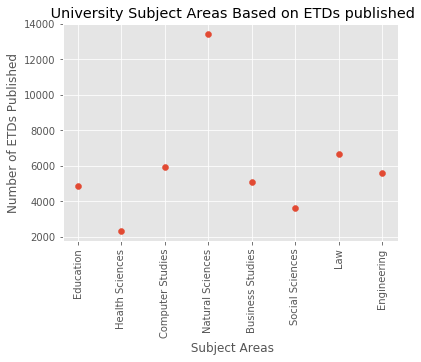

In [282]:
# 1. Exploratory Data Analysis of data
plt.scatter(var_dat["University Subject Areas"], var_dat["Number of ETDs published"])
plt.xticks(rotation=90)
plt.title(" University Subject Areas Based on ETDs published")
plt.xlabel(" Subject Areas")
plt.ylabel("Number of ETDs Published")

## Fit the Data and predict Clusters

In [286]:
# 1. Create KMeans object
var_dat_KMeans = KMeans(n_clusters=3)
var_dat_KMeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [287]:
# 2. Fit the input data on the KMeans object
var_dat_KMeans.fit(var_dat["Number of ETDs published"].values.reshape(-1, 1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [288]:
# 3. Predict the clusters
var_dat_clusters = var_dat_KMeans.predict(var_dat["Number of ETDs published"].values.reshape(-1, 1))

var_dat_clusters

array([0, 2, 0, 1, 0, 2, 0, 0], dtype=int32)

In [289]:
# 4. Inspect clusters
var_dat_clusters

array([0, 2, 0, 1, 0, 2, 0, 0], dtype=int32)

In [290]:
# 5. Merge predictions with original dataset
var_dat["clusters"] = var_dat_clusters

In [294]:
# 6. Inspect merged DataFrame
var_dat

,University Subject Areas,Number of ETDs published,clusters
0,Education,4854,0
1,Health Sciences,2295,2
2,Computer Studies,5955,0
3,Natural Sciences,13444,1
4,Business Studies,5064,0
5,Social Sciences,3610,2
6,Law,6660,0
7,Engineering,5572,0


([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

Text(0.5, 1.0, 'University Subject Areas Based on ETDs published')

Text(0.5, 0, ' Subject Areas')

Text(0, 0.5, 'Number of ETDs Published')

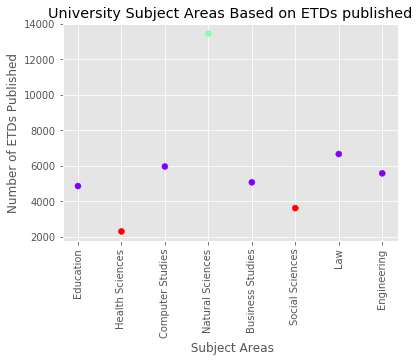

In [295]:
plt.scatter(var_dat["University Subject Areas"], var_dat["Number of ETDs published"], c=var_dat["clusters"], cmap="rainbow")
plt.xticks(rotation=90)
plt.title("University Subject Areas Based on ETDs published")
plt.xlabel(" Subject Areas")
plt.ylabel("Number of ETDs Published")

### Cluster with Scaled values

In [296]:
# 1. Create instance of MinMaxScaler
var_dat_scaler = MinMaxScaler()

In [298]:
# 2. Scale Amounts to be between 0 and 1
var_dat_scaler.fit(var_dat["Number of ETDs published"].values.reshape(-1, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [302]:
# 3. Transform the ETDs outpu values 
var_dat["Scaled"] = var_dat_scaler.transform(var_dat["Number of ETDs published"].values.reshape(-1, 1))

In [303]:
# 4. Inspect modified DataFrame to ensure values are within 0--1 range
var_dat

,University Subject Areas,Number of ETDs published,clusters,Scaled
0,Education,4854,0,0.229527
1,Health Sciences,2295,2,0.000000
2,Computer Studies,5955,0,0.328281
3,Natural Sciences,13444,1,1.000000
4,Business Studies,5064,0,0.248363
5,Social Sciences,3610,2,0.117948
6,Law,6660,0,0.391515
7,Engineering,5572,0,0.293928


In [304]:
# 1. Create KMeans object
var_dat_KMeans = KMeans(n_clusters=3)
var_dat_KMeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [305]:
# 2. Fit the input data on the KMeans object
var_dat_KMeans.fit(var_dat["Scaled"].values.reshape(-1, 1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [307]:
# 3. Predict the clusters
var_dat_clusters = var_dat_KMeans.predict(var_dat["Scaled"].values.reshape(-1, 1))

var_dat_clusters

array([0, 2, 0, 1, 0, 2, 0, 0], dtype=int32)

In [308]:
# 5. Merge predictions with original dataset
var_dat["scaled_clusters"] = var_dat_clusters

In [309]:
# 5. Merge predictions with original dataset
var_dat["scaled_clusters"] = var_dat_clusters

In [310]:
# 6. Inspect merged DataFrame
var_dat

,University Subject Areas,Number of ETDs published,clusters,Scaled,scaled_clusters
0,Education,4854,0,0.229527,0
1,Health Sciences,2295,2,0.000000,2
2,Computer Studies,5955,0,0.328281,0
3,Natural Sciences,13444,1,1.000000,1
4,Business Studies,5064,0,0.248363,0
5,Social Sciences,3610,2,0.117948,2
6,Law,6660,0,0.391515,0
7,Engineering,5572,0,0.293928,0


## Scatter Plot of Scaled Values

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

Text(0.5, 1.0, 'University Subject Areas Based on ETDs published')

Text(0.5, 0, ' Subject Areas')

Text(0, 0.5, 'Number of ETDs Published')

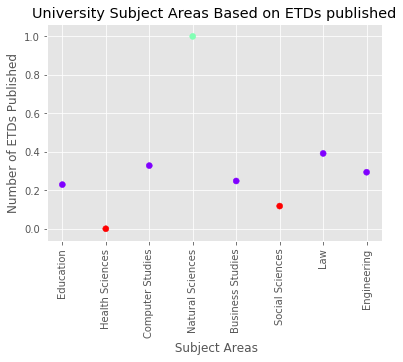

In [312]:
plt.scatter(var_dat["University Subject Areas"], var_dat["Scaled"], c=var_dat["scaled_clusters"], cmap="rainbow")
plt.xticks(rotation=90)
plt.title("University Subject Areas Based on ETDs published")
plt.xlabel(" Subject Areas")
plt.ylabel("Number of ETDs Published")

In [313]:
var_data_input = var_dat["Scaled"].values.reshape(-1, 1)
var_sse = {}
for k in range(1, 7):
    var_kmeans = KMeans(n_clusters=k).fit(var_data_input)
    var_data["k_clusters"] = var_kmeans.labels_
    var_sse[k] = var_kmeans.inertia_ 

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'University Subject Areas Based on ETDs published Elbow Plot')

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Sum of Squares Error')

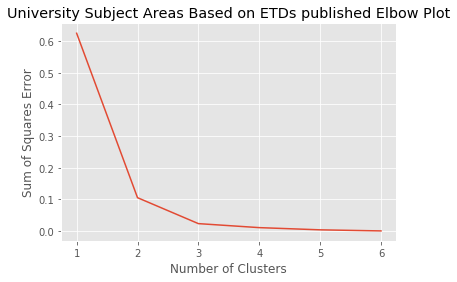

In [314]:
plt.figure()
plt.plot(list(var_sse.keys()), list(var_sse.values()))
plt.title("University Subject Areas Based on ETDs published Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squares Error")